In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(0)
np.random.seed(0)

In [2]:
# Define the quadratic function
def f(x):
    return 0.5*x**2 - 5*x + 13

In [3]:
dataset_b = {'dataset': [{'x': 0, 'y': 14},
  {'x': 1, 'y': 6.3},
  {'x': 2, 'y': 2.835},
  {'x': 3, 'y': 1.27575},
  {'x': 4, 'y': 0.5735875},
  {'x': 5, 'y': 0.258114375},
  {'x': 6, 'y': 0.11615146875},
  {'x': 7, 'y': 0.0522681609375},
  {'x': 8, 'y': 0.023520672421875},
  {'x': 9, 'y': 0.01058430258984375},
  {'x': 10, 'y': 0.0047629360654296874}]}

# Get max y value to normalize the transformed dataset
max_y = max(item['y'] for item in dataset_b['dataset'])

# Get min and max x values to calculate the transformation factor
min_x = min(item['x'] for item in dataset_b['dataset'])
max_x = max(item['x'] for item in dataset_b['dataset'])

# The transformation factor will depend on the range of x values
factor = (max_x - min_x) / 10

# Perform the transformation
for item in dataset_b['dataset']:
    item['y'] = max_y / math.pow(factor * item['x'], 2) if item['x'] != 0 else max_y

In [4]:
dataset_a = {'dataset': [{'x': 0, 'y': 14},
  {'x': 1, 'y': 6.3},
  {'x': 2, 'y': 2.835},
  {'x': 3, 'y': 1.27575},
  {'x': 4, 'y': 0.5735875},
  {'x': 5, 'y': 0.258114375},
  {'x': 6, 'y': 0.11615146875},
  {'x': 7, 'y': 0.0522681609375},
  {'x': 8, 'y': 0.023520672421875},
  {'x': 9, 'y': 0.01058430258984375},
  {'x': 10, 'y': 0.0047629360654296874}]}

In [6]:
def generate_new_dataset(dataset, x_noise_std_dev=0.1, y_noise_std_dev=0.1):
    target_dataset = {'dataset': []}
    for point in dataset['dataset']:
        x = point['x'] + np.random.normal(0, x_noise_std_dev)
        y = point['y'] + np.random.normal(0, y_noise_std_dev)
        target_dataset['dataset'].append({'x': x, 'y': y})
    return target_dataset

target_dataset = generate_new_dataset(dataset_b)

In [8]:
target_dataset

{'dataset': [{'x': 0.1764052345967664, 'y': 14.040015720836722},
  {'x': 1.097873798410574, 'y': 14.224089319920147},
  {'x': 2.1867557990149966, 'y': 3.4022722120123587},
  {'x': 3.0950088417525587, 'y': 1.5404198347257858},
  {'x': 3.989678114820644, 'y': 0.9160598501938373},
  {'x': 5.014404357116088, 'y': 0.7054273506962976},
  {'x': 6.076103772514699, 'y': 0.4010563905381717},
  {'x': 7.0443863232745425, 'y': 0.3190817184517124},
  {'x': 8.14940790731576, 'y': 0.1982341736234199},
  {'x': 9.03130677016509, 'y': 0.08742993224266701},
  {'x': 9.744701018416592, 'y': 0.20536185954403607}]}

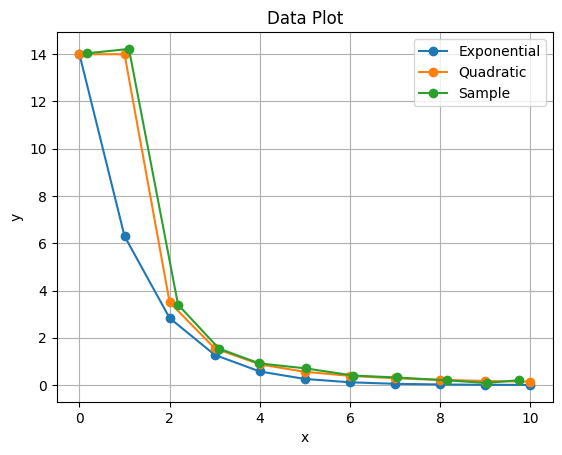

In [7]:
x_values_a = [item['x'] for item in dataset_a['dataset']]
y_values_a = [item['y'] for item in dataset_a['dataset']]

x_values_b = [item['x'] for item in dataset_b['dataset']]
y_values_b = [item['y'] for item in dataset_b['dataset']]

x_values_c = [item['x'] for item in target_dataset['dataset']]
y_values_c = [item['y'] for item in target_dataset['dataset']]

plt.plot(x_values_a, y_values_a, marker='o', label='Exponential')
plt.plot(x_values_b, y_values_b, marker='o', label='Quadratic')
plt.plot(x_values_c, y_values_c, marker='o', label='Sample')

plt.title("Data Plot")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.savefig('test.png')
plt.show()